<a href="https://colab.research.google.com/github/prakashabhishek/deep_learning_with_tensorflow/blob/main/02_using_tensorflow_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
print(tf.__version__)
print('Available GPU device:',tf.config.list_physical_devices('GPU'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.datasets import make_circles


import matplotlib.pyplot as plt

2.4.1
Available GPU device: []


In this notebook we are going to build and fit various neural networks for classification problem.

* Binary classification
* Multiclass classification
* Multilabel classification


In [ ]:
# Creating data to view and fit

n_sample = 1000

X, y = make_circles(n_samples=n_sample, noise = 0.03, random_state= 42)
print(X.shape, y.shape)

(1000, 2) (1000,)


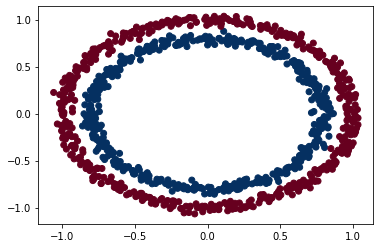

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdBu)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape)

(800, 2) (200, 2)


In [ ]:
# Set random state 
tf.random.set_seed(42)

# Build model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

history_1 = model_1.fit(x_train, y_train, epochs = 100, verbose = 0)

model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4800


[0.6944702863693237, 0.47999998927116394]

Let's try and imrpove the model as it's basically guessing at this stage. 

In this stage we will just add 1 more hidden layer with 1 unit in the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

history_2 = model_2.fit(x_train, y_train, epochs = 100, verbose = 0)

model_2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4800


[0.6947243213653564, 0.47999998927116394]

Model is still guessing,i.e, it's still underfitting on the train set resulting in high **Bias** so we need to make the model more complex.

We will now try tweaking various parameters like 
* activation function
* add more layers
* increasing the number of units(neurons) in each layer
* change optimization functions
* change learning rate 
* running it for longer epochs

In [ ]:
# Increasing the number of units in hidden layers and adding 1 hidden layer
# Change optimizer to Adam

# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(x_train, y_train, epochs = 100, verbose = 0)

model_3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5700


[0.6947789788246155, 0.5699999928474426]

The accuracy has increased slightly but it's still not enough to call this model a good model. 

Let's visualize the predictions as try to find some patterns

In [ ]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by the model
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() - 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() - 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # Create x values (we are going to make predictions on them)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('Doing for multi-class classification')
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print('Doing for binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:, 0], x[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

Doing for binary classification


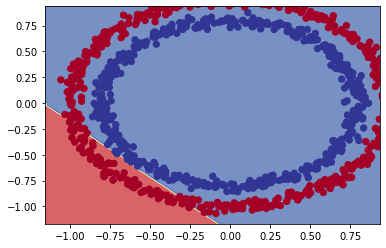

In [ ]:
plot_decision_boundary(model_3, X, y)

Visualizing above image made us realize that the model is trying to fit a linear decision boundary to a non-linear problem. 

We will try to fit a model with a non linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation= 'relu'),
                               tf.keras.layers.Dense(10, activation= 'relu'),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(x_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 6.3897 - accuracy: 0.5025
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 2.4310 - accuracy: 0.5117
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 1.0104 - accuracy: 0.4818
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9109 - accuracy: 0.4635
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8321 - accuracy: 0.4810
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7811 - accuracy: 0.5032
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7692 - accuracy: 0.4744
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.3893
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7509 - accuracy: 0.3622
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7450 - accuracy: 0.3482
Epoch 11/

Doing for binary classification


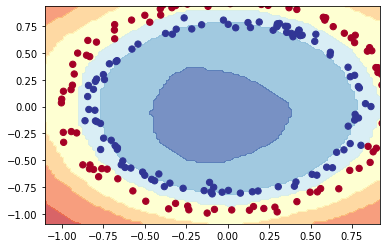

In [ ]:
plot_decision_boundary(model_4, x_test, y_test)

In [ ]:
model_4.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 1.0000


[0.02397826500236988, 1.0]

In [ ]:
# Try various hyper-parameters

# Set random seed
tf.random.set_seed(42)

# Build the model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation= tf.keras.activations.relu), 
                               tf.keras.layers.Dense(20, activation= tf.keras.activations.relu),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics = ['accuracy'])

history_5 = model_5.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 5.7420 - accuracy: 0.5025
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 3.7303 - accuracy: 0.5108
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 1.8801 - accuracy: 0.3656
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.8643 - accuracy: 0.4622
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.8202 - accuracy: 0.4607
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7705 - accuracy: 0.4776
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7631 - accuracy: 0.4501
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7557 - accuracy: 0.3987
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7521 - accuracy: 0.3535
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7423 - accuracy: 0.3728
Epoch 11/50
25/25 [

In [ ]:
model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.9350


[0.355902761220932, 0.9350000023841858]

Doing for binary classification


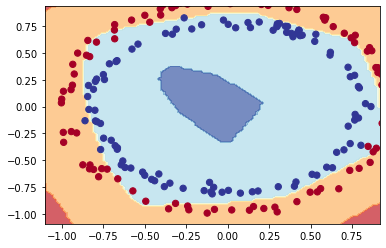

In [ ]:
plot_decision_boundary(model_5, x_test, y_test)